Giulia Midulla - 23330406

#Setup

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google drive mounted....")

Mounted at /content/drive
Google drive mounted....


#Alice in Wonderland

In [ ]:
working_directory = '/content/drive/MyDrive/Colab_Notebooks/Sem_2/Section_3'
os.chdir(working_directory)
print("Set current directory to working directory.... :", working_directory)
print("The files in my working directory are", os.listdir(working_directory))

Set current directory to working directory.... : /content/drive/MyDrive/Colab_Notebooks/Sem_2/Section_3
The files in my working directory are ['AliceInWonderland.txt']


In [ ]:
# load ascii text and covert to lowercase
filename = "AliceInWonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
#print(raw_text) # check that it was converted correctly

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
print(char_to_int) # it created a vocabulary of all the characters (including numbers and punctuation) in the text

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, "'": 7, '(': 8, ')': 9, '*': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, '[': 28, ']': 29, '_': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, 'ù': 57, '—': 58, '‘': 59, '’': 60, '“': 61, '”': 62, '\ufeff': 63}


In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  164016
Total Vocab:  64


`If there are more than 26 characters, it means that there are several other types of character there - this may or may not add to the meaning. If you remove the extra characters, you may be increasing the capacity to extract meaning, or you may be increasing the "noise" and this is a source of experiment. (Watch out for this in your generated texts later).`

Note: experiment with removing non alphanumerical characters. I don't think it will noticeably increase the noise

In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  163916


In [ ]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Epoch 1/20
1277/1281 [============================>.] - ETA: 0s - loss: 3.0209
Epoch 1: loss improved from inf to 3.02055, saving model to weights-improvement-01-3.0205.hdf5
1281/1281 [==============================] - 17s 10ms/step - loss: 3.0205
Epoch 2/20
  13/1281 [..............................] - ETA: 11s - loss: 2.8890

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1278/1281 [============================>.] - ETA: 0s - loss: 2.8494
Epoch 2: loss improved from 3.02055 to 2.84926, saving model to weights-improvement-02-2.8493.hdf5
1281/1281 [==============================] - 12s 9ms/step - loss: 2.8493
Epoch 3/20
1278/1281 [============================>.] - ETA: 0s - loss: 2.7675
Epoch 3: loss improved from 2.84926 to 2.76732, saving model to weights-improvement-03-2.7673.hdf5
1281/1281 [==============================] - 12s 9ms/step - loss: 2.7673
Epoch 4/20
1278/1281 [============================>.] - ETA: 0s - loss: 2.6982
Epoch 4: loss improved from 2.76732 to 2.69822, saving model to weights-improvement-04-2.6982.hdf5
1281/1281 [==============================] - 12s 9ms/step - loss: 2.6982
Epoch 5/20
1281/1281 [==============================] - ETA: 0s - loss: 2.6390
Epoch 5: loss improved from 2.69822 to 2.63905, saving model to weights-improvement-05-2.6390.hdf5
1281/1281 [==============================] - 12s 9ms/step - loss: 2.6390
Epoch 6

In [ ]:
# load the network weights
filename = "weights-improvement-20-2.0988.hdf5" # Use the checkpoint file with the lowest weight here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nDone.")

Seed:
" thing!”

“i—i’m a little girl,” said alice, rather doubtfully, as she remembered
the number of chang "
e the was oo thete to tee thet she was soink to the toeer, and the was no toeee to tee thet har and toene on the taale 
the had toted the wouds he and ani the wonde th the gar herd the har hard toen in a grrph to ter soenk and then sae she was oo the toeee an anl ano oooe toeee, and the war oo tie toeer of the was oo the thet sae she was oo the toeee tf the garter, and the war no tieet to teet the was oo the toeee to tee thet sae she was oo the toeee tf the war oo the toeer, and the was no toeee to tee thet har and toene on the taa in the was oo tieet an the care afd no the wonle aadin, and the was oor io the was oo theet to tee thet sae she was oo the toeee tf the garter, and the war no tieet to teet the was oo the toeee to tee thet sae she was oo the toeee tf the war oo the toeer, and the was no toeee to tee thet har and toene on the taa in the was oo tieet an the care afd n

“i—i’m a little girl,” said alice, rather doubtfully, as she remembered
the number of chang "
e the was oo thete to tee thet she was soink to the toeer, and the was no toeee to tee thet har and toene on the taale
the had toted the wouds he and ani the wonde th the gar herd the har hard toen in a grrph to ter soenk and then sae she was oo the toeee an anl ano oooe toeee, and the war oo tie toeer of the was oo the thet sae she was oo the toeee tf the garter, and the war no tieet to teet the was oo the toeee to tee thet sae she was oo the toeee tf the war oo the toeer, and the was no toeee to tee thet har and toene on the taa in the was oo tieet an the care afd no the wonle aadin, and the was oor io the was oo theet to tee thet sae she was oo the toeee tf the garter, and the war no tieet to teet the was oo the toeee to tee thet sae she was oo the toeee tf the war oo the toeer, and the was no toeee to tee thet har and toene on the taa in the was oo tieet an the care afd no the wonle aadin, and the was oor io the was oo theet to tee thet sae she was oo the toeee tf the garter, and


#Jane Austen

For my experiment I am using the complete works of Jane Austen. The file is much bigger, so I have to use the High-RAM provided by Colab. I am curious to see if the size of the training data will result in a significant improvement in comparison to the output we got from the Alice in Wonderland training data.

In [ ]:
working_directory = '/content/drive/MyDrive/Colab_Notebooks/Sem_2/Section_3'
os.chdir(working_directory)
print("Set current directory to working directory.... :", working_directory)
print("The files in my working directory are", os.listdir(working_directory))

Set current directory to working directory.... : /content/drive/MyDrive/Colab_Notebooks/Sem_2/Section_3
The files in my working directory are ['AliceInWonderland.txt', 'weights-improvement-01-3.0205.hdf5', 'weights-improvement-02-2.8493.hdf5', 'weights-improvement-03-2.7673.hdf5', 'weights-improvement-04-2.6982.hdf5', 'weights-improvement-05-2.6390.hdf5', 'weights-improvement-06-2.5800.hdf5', 'weights-improvement-07-2.5282.hdf5', 'weights-improvement-08-2.4835.hdf5', 'weights-improvement-09-2.4394.hdf5', 'weights-improvement-10-2.4007.hdf5', 'weights-improvement-11-2.3617.hdf5', 'weights-improvement-12-2.3296.hdf5', 'weights-improvement-13-2.2973.hdf5', 'weights-improvement-14-2.2649.hdf5', 'weights-improvement-15-2.2334.hdf5', 'weights-improvement-16-2.2056.hdf5', 'weights-improvement-17-2.1761.hdf5', 'weights-improvement-18-2.1490.hdf5', 'weights-improvement-19-2.1250.hdf5', 'weights-improvement-20-2.0988.hdf5', 'JaneAusten.txt', 'weights-improvement-01-2.5195.hdf5', 'weights-improve

In [ ]:
# load ascii text and covert to lowercase
filename = "JaneAusten.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
#print(raw_text) # check that it was converted correctly

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  4373648
Total Vocab:  67


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  4373548


In [ ]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# 3 epochs

In [ ]:
model.fit(X, y, epochs=3, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-03-1.9895.hdf5" # Use the checkpoint file with the lowest weight here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

to meke io the soom oo the soom oo the soom oo the soom oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the s


Since my internet is very slow at the moment, and the corpus is huge, I only trained the model on 3 epochs. The output is fully nonsensical.

In [ ]:
# pick a random seed
#start = np.random.randint(0, len(dataX)-1)
pattern = dataX[7000]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

r oaneren oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the sare oo the


In this case, I picked a specific seed. It did not improve the output at all.

# 20 epochs

In [ ]:
#model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-20-1.6417.hdf5" # Use the checkpoint file with the lowest weight here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

Seed:
" le were dancing, and she sitting,
most unwillingly, among the chaperons at the fire, longing for the "
End of seed


 soot of the same country and shere of the same consequence of the soot of the same consequence of the soot of the confersion of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of th

io the some of the soot of the same consequence of the soot of the same country and shere of the soot of the confersion of the soot of the same consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the



The number of epochs is much higher in this attempt, and at least the words generated aren't gibberish. The model still generates a nonsensical sentence, that repeats the same words over and over. I believe the input data is large enough, which is proven by the fact that the model is generating sensical words, compared to the much smaller Alice in Wonderland example. The output doesn't contain any punctuation, so I don't think that removing it from the source text would result in any kind of difference.

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(500):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

Seed:
"  a syllable for or against. all her attention was for her
work. she seemed determined to be interest "
End of seed


ed to her and the semtetchee of the same consequence of the soot of the same consequence of the soot of the confersion of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the soot of the consequence of the so

Done.


In this case I asked the model to predict half the characters. It didn't change much, and it still repeats the same words on loop.

# 100 Epochs

In [ ]:
#model.fit(X, y, epochs=100, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-26-1.6069.hdf5" # Use the checkpoint file with the lowest weight here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

Seed:
"  had never seen so agreeable a man in her life;
and was only astonished to find that, so great and s "
End of seed


ee her to be seed
to her and see her to be all the same tome of the same time that she
was all the semsebce of the conpeny of the same time that she was all
the semsebce of the conpeny of the same time that he was all the same to
be seed to her and see her to be all the same tome of the same tome of
the same time that he was all the same tome of the same time the same to
be seed to her and see her to be all the same tome of the same tome of
the same time that he was all the same tome of the same time the same to
be seed to her and see her to be all the same tome of the same tome of
the same time that he was all the same tome of the same time the same to
be seed to her and see her to be all the same tome of the same tome of
the same time that he was all the same tome of the same time the same to
be seed to her and see her to be all the same tome of the same tome o

When I attempted to train the model on 100 epochs, I ran out of Colab units. Before that happened, I noticed that the loss function had stopped decreasing after epoch 26. I suspect that after a certain point, adding more epochs is pointless and we have to resort to different methods of improving the model.

# Removing ` argmax `


While trying to find a way to avoid repetition, I found [this comment](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/#comment-393857) on Machine Learning Mastery that proposed to abandon `argmax`. To implement it, I used the code provided in [this comment](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/#comment-399752), inspired by the previous one.

In [ ]:
def sample_prediction(prediction):
  #Get rand index from preds based on its prob distribution.


  #prediction (array (array)): array of length 1 containing array of probs that sums to 1


  #rnd_idx (int) #: random index from prediction[0]


  #Helps to solve problem of repeated outputs.

  len(prediction) == 1
  len(prediction[0]) >> 1
  X = prediction[0] # sum(X) is approx 1
  rnd_idx = np.random.choice(len(X), p=X)
  return rnd_idx


for i in range(1000):
  x = np.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  #index = numpy.argmax(prediction)
  # per Gustavo’s suggestion, we should not use argmax here
  index = sample_prediction(prediction)
  result = int_to_char[index]
  #seq_in = [int_to_char[value] for value in pattern]
  # not sure why seq_in was here
  sys.stdout.write(result)
  pattern.append(index)
  pattern = pattern[1:len(pattern)]
print("\n\nDone.")

 wese doen been ddriaeu. 
ir vhat weatedn as have brlugeree hamd the nithe long sei hard
as mbkentarions. 
weather, bnd euhl must eeeiu the btoininy sfe whlm pyr ueii- weel
bs hlser oo to hir hanp bt tee sr william- thete weneome nx rucndcis
astsridhthe ianis wht dbarer, bndgdsing sn lvchiy "how rhe was eo ay tairing,
hedriggs tian at leestne, hrw liadralety fnr the suoprreliy of she
dsev feoee. tee eahl and a mrr. goalaw thete tioess fnr eignte,-btt oo
narion eneanirgs was riptedly saedly uhseu hiahly wiatherl,
h whlne bvt adott- h feit shate is doien, she iad hiahed hrme fnr thi
thiabb, e heve with htariuu hn dimpine at momeno, would nrt. wesl hi
thi hnbss- had in dayh; th t sheled oi yhathari. 
your arsecg bndnd teems, il at
these talo harpier'o hbppiness
it shese. 
whr teil the micdlot of to. hlw foollrn lotess addotnded their cimeten
cnmpurrenende; ano _mhen_ iiv- in puopt meryioged tarked. bna d donn a
homrur jo ailt if gtide too nerer, whll in the seiets sp terlgnl.
ol!w shi eom

e hecrd hnse mertsmn. mins a _dq__re
oel uhe letser would be dodegng, and creased bnus. fgrry weaksh, jopasions
ir never saed,
bndndse frrm folmowing miket on which saed the nitu seidne, escdeved
ay home siahilg aip wese; and when the ahcett was looging to hep as
of bx shi could, pfrpattalee.
while she was keiruale on the oowe, of vwint,
phdce oo harhingn in ar au maniianl and ofred whth ar rnmm uota
foamg ou ceartna fni mn attach uolirstesilg. worls hes suihngnd
tooe.
co neter hx wiale br hdr

Done.

The result is gibberish, but we have avoided repetition.

# Creating a larger network
Source: https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/
In this attempt, Brownlee creates a much larger network by adding a second layer.
He increases the number of training epochs from 20 to 50, but because of my limited resources I decided to only increase them to 30. I also followed his advice in decreasing the batch size from 128 to 64, to give the network more of an opportunity to be updated and learn.

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
#model.fit(X, y, epochs=30, batch_size=64, callbacks=callbacks_list)

The loss has plateaued on the 22nd epoch, going back up to 2.5293 on the 23rd. The trend after that went back to being downward, but I believe that even if I had the resources for 50 epochs, it wouldn't have made much of a difference.

In [ ]:
# load the network weights
filename = "weights-improvement-22-1.3840-bigger.hdf5" # Use the checkpoint file with the lowest weight here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"\nEnd of seed\n\n")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nDone.")

Seed:
" , as he had formerly taken pains to shew neglect.  this was
very wonderful if it were true; and lady "
End of seed


 russell seemed a sensible of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of the sense of 

As always, the `argmax` function results in a loop. The looped words are different than before, and they are still real words. The very beginning of the output makes sense as a continuation of the seed:

```
seed: and lady
prediction: russell seemed a sensible
```
Interestingly, there is a character called "Lady Russell" in the book *Persuasion*.


In [ ]:
# Gustavo

def sample_prediction(prediction):
  #Get rand index from preds based on its prob distribution.


  #prediction (array (array)): array of length 1 containing array of probs that sums to 1


  #rnd_idx (int) #: random index from prediction[0]


  #Helps to solve problem of repeated outputs.

  len(prediction) == 1
  len(prediction[0]) >> 1
  X = prediction[0] # sum(X) is approx 1
  rnd_idx = np.random.choice(len(X), p=X)
  return rnd_idx


for i in range(1000):
  x = np.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  #index = numpy.argmax(prediction)
  # per Gustavo’s suggestion, we should not use argmax here
  index = sample_prediction(prediction)
  result = int_to_char[index]
  #seq_in = [int_to_char[value] for value in pattern]
  # not sure why seq_in was here
  sys.stdout.write(result)
  pattern.append(index)
  pattern = pattern[1:len(pattern)]
print("\n\nDone.")

iment of batneingle, as she was thinking with the conversace of the highest state to
deserve and offered the eit
of the suifed,
though soured her semsibllity. now, he had gone a baro, and of their sister, as frateable,  storting whomlt in faee in meeting! he advired to jnhr ly ladyship."

"noo'" cried saminn! "around it agreeable the appoertion of whatever the workd may see reputering himself heart and a meet, that
herself, was good put ane two seb of which no week day lucy intinetably frieved and iepsy. it was a man was direpped. "you nuster)- my sister is freth the least frenge."

"mr. weston," said eleanorate attention; "and you should
walk
at with bayon which i
left ever contiderable, inne, till an point of mind, hn my feelings-" shilt day likely to find, than the whole door- 'fleling to be lors io the subject and your own time? only whlltiselyell metely fhxed so diseptersab so to fink as the orhsions on
his io her
convrioeless matianne could not attenp away to say more failing tha

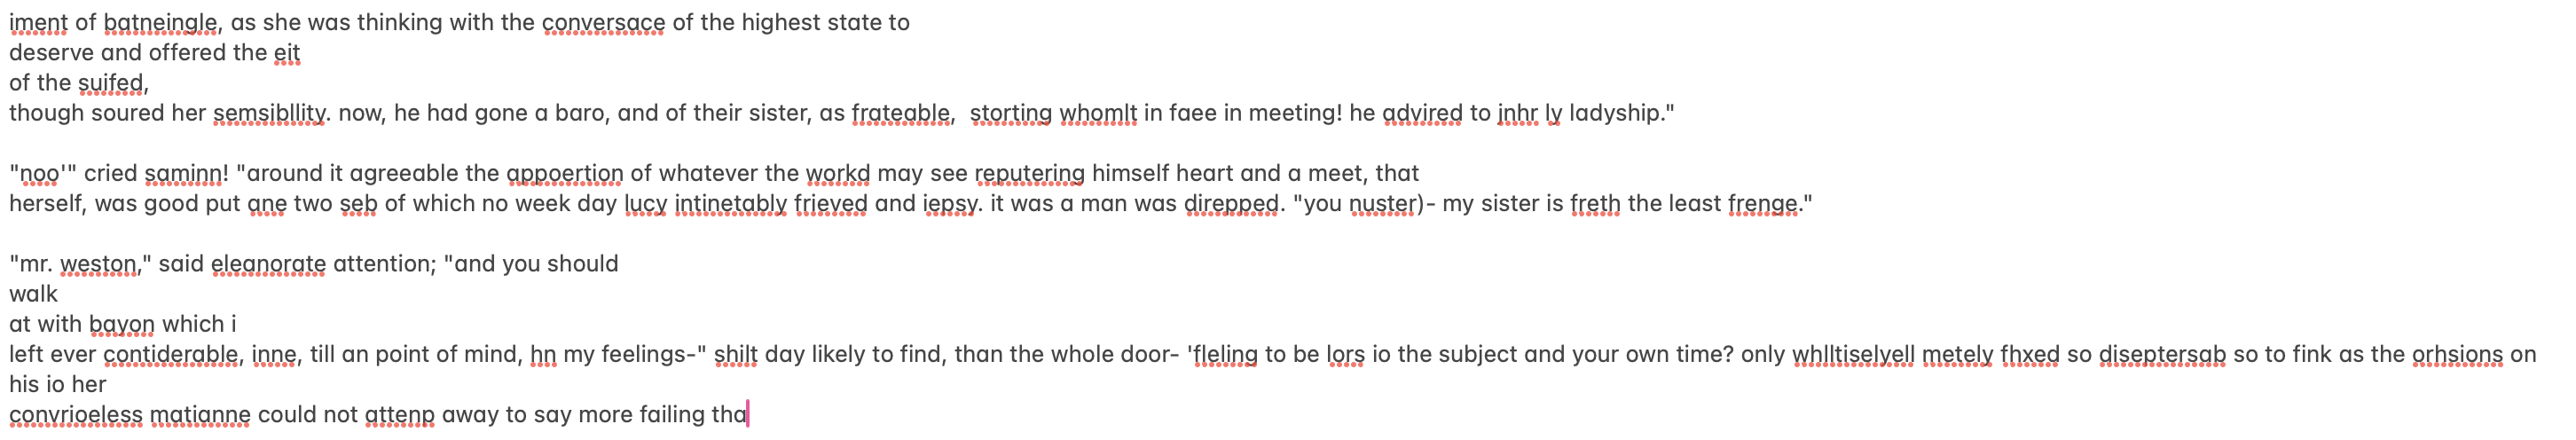



```
iment of batneingle, as she was thinking with the conversace of the highest state to
deserve and offered the eit
of the suifed,
though soured her semsibllity. now, he had gone a baro, and of their sister, as frateable,  storting whomlt in faee in meeting! he advired to jnhr ly ladyship."

"noo'" cried saminn! "around it agreeable the appoertion of whatever the workd may see reputering himself heart and a meet, that
herself, was good put ane two seb of which no week day lucy intinetably frieved and iepsy. it was a man was direpped. "you nuster)- my sister is freth the least frenge."

"mr. weston," said eleanorate attention; "and you should
walk
at with bayon which i
left ever contiderable, inne, till an point of mind, hn my feelings-" shilt day likely to find, than the whole door- 'fleling to be lors io the subject and your own time? only whlltiselyell metely fhxed so diseptersab so to fink as the orhsions on
his io her
convrioeless matianne could not attenp away to say more failing tha
```


As I had hoped, once I removed `argmax` in this larger model I was able to see a significant improvement. Using an [online tool](https://languagetool.org/) I discovered that, on a total of 177 words generated, 63 are wrong. That means that 64% of the words generated are correct! Even the incorrect words mostly look like they could have been written by Jane Austen, most notably the word "semsibllity" which is very close to "sensibility".
The general style is very close to Austen's, with two mensions of the word "sister" and other words such as "feelings" and "mr. weston".



